## Set Up Network

**This is the code to produce a sample set for and train a neural network.**
All python source code is in the neural.py file

In [ ]:
%pylab inline
from Chempy.parameter import ModelParameters
a = ModelParameters()

In [ ]:
# First create the training dataset
from Chempy.neural import training_data
#%timeit -r 1 -n 1 training_data()

The above was run on a faster machine, taking 2 hours, 26 minutes and 28 seconds to calculate a training dataset of length 15625. This is stored in the 'Neural/' folder


In [ ]:
# Now create the datasets for model verification (i.e. hyperparameter constraints)
# and for final testing

from Chempy.neural import verification_and_testing
# %timeit -r 1 -n 1 verification_and_testing()

This was again run on a faster PC. The runtime was 19 minutes and 10 seconds, producing the verif_param_grid, verif_abundances, test_param_grid, test_abundances npy data files

## Hyperparameter Optimization

In [1]:
## The code below will allow optimization of hyperparameter
%pylab inline
from Chempy.parameter import ModelParameters
a = ModelParameters()

Populating the interactive namespace from numpy and matplotlib


Creating network 1 of 4
Training epoch 0 of 5000 complete
Training epoch 1000 of 5000 complete
Training epoch 2000 of 5000 complete
Training epoch 3000 of 5000 complete
Training epoch 4000 of 5000 complete


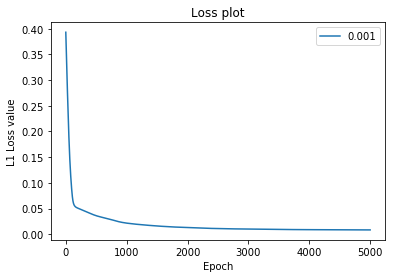

FileNotFoundError: [Errno 2] No such file or directory: 'Neural/verif_abundances.npy'

In [3]:
# To plot neural network error against learning rate for optimization

from Chempy.neural import create_network,neural_errors

learning_rate = [0.001, 0.004, 0.007 ,0.01] #
#learning_rate = 10**np.linspace(-4,-0.5,5)
upper = np.zeros((len(learning_rate),1))
lower = np.zeros((len(learning_rate),1))
median = np.zeros((len(learning_rate),1))

for i,lr in enumerate(learning_rate):
    print("Creating network %d of %d" %(i+1,len(learning_rate)))
    create_network(learning_rate=lr,Plot=True)
    param_error = neural_errors('verif')
    median[i] = np.median(param_error)
    lower[i] = np.percentile(param_error,15.865)
    upper[i] = np.percentile(param_error,100-15.865)
    


In [ ]:
print(median)
plt.clf()
plt.errorbar((learning_rate),median,yerr=[median-lower,upper-median])
plt.ylabel('Median L1 error (dex)')
plt.xlabel('Learning Rate')
plt.title('Optimization of Learning Rate')

## Analysis of Optimal Set
*Now using test dataset*

Populating the interactive namespace from numpy and matplotlib
Training epoch 0 of 5000 complete


/home/philcox/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['median']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Training epoch 1000 of 5000 complete
Training epoch 2000 of 5000 complete
Training epoch 3000 of 5000 complete
Training epoch 4000 of 5000 complete


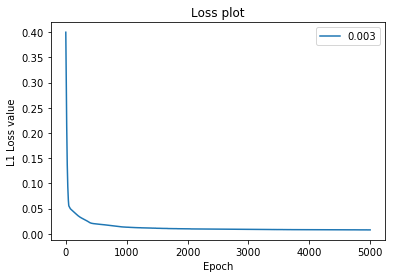

In [4]:
# Now create and train the neural network for optimal hyperparameters
%pylab inline
from Chempy.neural import create_network
learning_rate = 0.003
epoch, loss = create_network(learning_rate=learning_rate)

In [ ]:
# Create the corner plot
%pylab inline
from Chempy.neural import neural_corner_plot, neural_errors
param_error = neural_errors('test')
med = np.median(param_error)
up = np.percentile(param_error, 100-15.865)
low = np.percentile(param_error, 15.865)
print('Median error is %.5f - %.5f + %.5f' %(med, med-low, up-med))
neural_corner_plot('test')

In [ ]:
dat=plt.hist(param_error,bins=100)
plt.xlabel('Median error in dex')
plt.xlim([0.,0.05])
plt.ylabel('Frequency')
plt.title('Histogram Plot for Neural Network error')
plt.savefig('Neural/neural_hist.pdf',bbox_inches='tight',dpi=300)

In [ ]:
%pylab inline
from Chempy.neural import neural_errors,neural_output
param_error = neural_errors('test')
param_grid = np.load('Neural/test_param_grid.npy')
chempy_data = np.load('Neural/test_abundances.npy')
neural_data = []
for i in range(len(param_grid)):
    neural_data.append(neural_output(param_grid[i]))

In [ ]:
## ABUNDANCE COMPARISON
%pylab inline
# Using first random datapoint in testset
from Chempy.parameter import ModelParameters
a = ModelParameters()
# Prepare plot
fig = plt.figure(figsize=(30.69,8.27), dpi=300)
plt.clf()
text_size = 15
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.)
plt.rc('lines', linewidth = 1.)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,'font.size' : 16,'font.family' : 'libertine','text.latex.unicode': True}
ax = fig.add_subplot(111)
abundance_names = []
proto_sun = np.load('Chempy/input/stars/Proto-sun.npy')
for item in proto_sun.dtype.names[:-1]:
    if item != 'Fe':
        abundance_names.append('[%s/Fe]' %(item))
    else:
        abundance_names.append('[Fe/H]')
plt.xticks(np.arange(len(a.element_names)),abundance_names)

sol_dat = np.load('Chempy/input/stars/Proto-sun.npy')
abun = []
err = []
for i in range(len(sol_dat[0])-1):
    abun.append(sol_dat[0][i])
    err.append(sol_dat[1][i])
plt.plot(neural_data[0],'r',label='Neural')
plt.plot(chempy_data[0],'g',label='Chempy')
plt.errorbar(np.arange(len(abun)),abun,yerr=err,label='Proto-Solar')
plt.legend()
plt.ylabel("Abundances relative to solar in dex")
plt.xlabel("Element")
plt.title("Abundance plot for parameters %s" %(param_grid[0]))
#savefig('Neural/neural_abundances',bbox_inches='tight')
savefig('Pres/neural_abundances',bbox_inches='tight')

**NOTES / TO DO (see other file also)**
- *Change the diagonal to be correct histogram of data - DONE*
- *Color histogram by mean error in that bar - DONE*
- *Add other params - DONE*
- *Sort axis names - DONE*
- *SORT axis sizes (see plot_mcmc.py) - DONE*
- *Vectorize neural output calculation - probably not necessary*
- *Add support for corner plot to take either dataset - DONE*

In [ ]:
from Chempy.neural import neural_output
param = [-3.,-3.,-0.8,-0.5,0.5,0.5]

In [ ]:
len(neural_output(param))

In [ ]:
coeffs = np.load('Neural/neural_model.npz')
w_array_0 = coeffs['w_array_0']
w_array_1 = coeffs['w_array_1']
b_array_0 = coeffs['b_array_0']
b_array_1 = coeffs['b_array_1']

In [ ]:
b_array_1.shape

In [ ]:
tr_output = np.load('Neural/training_abundances.npy')	

# Calculate the model dimensions
dim_out = tr_output.shape[1]


In [ ]:
dim_out